In [4]:
%run data.py

In [2]:
zipcode_data = fetchData(nyc_zcta_url)
zipcode_data.head(10)

,MODZCTA,Positive,Total,zcta_cum.perc_pos
0,NaN,1627,1922,84.65
1,10001.0,313,976,32.07
2,10002.0,905,2219,40.78
3,10003.0,407,1347,30.22
4,10004.0,28,93,30.11
5,10005.0,54,227,23.79
6,10006.0,21,99,21.21
7,10007.0,48,215,22.33
8,10009.0,616,1900,32.42
9,10010.0,239,1038,23.03


In [111]:
zipcode_old_df = spark.createDataFrame(zipcode_data)

zipcode_df = zipcode_old_df.select(zipcode_old_df.MODZCTA.cast("integer").alias("zipcode"),
                                zipcode_old_df["Positive"], zipcode_old_df["Total"])

zipcode_df = zipcode_df.filter(zipcode_df["zipcode"] != 0)
zipcode_df.show()

+-------+--------+-----+
|zipcode|Positive|Total|
+-------+--------+-----+
|  10001|     313|  976|
|  10002|     905| 2219|
|  10003|     407| 1347|
|  10004|      28|   93|
|  10005|      54|  227|
|  10006|      21|   99|
|  10007|      48|  215|
|  10009|     616| 1900|
|  10010|     239| 1038|
|  10011|     473| 1422|
|  10012|     149|  531|
|  10013|     225|  760|
|  10014|     272|  834|
|  10016|     615| 2153|
|  10017|     128|  526|
|  10018|     194|  578|
|  10019|     532| 1637|
|  10021|     498| 1815|
|  10022|     305| 1142|
|  10023|     506| 1821|
+-------+--------+-----+
only showing top 20 rows



In [6]:
results_df = fetch_nycOpenData(nyc_income, 100, 10000)
results_df.head(10)


,project_id,project_name,program_group,project_start_date,building_id,house_number,street_name,borough,postcode,bbl,...,_3_br_units,_4_br_units,_5_br_units,_6_br_units,unknown_br_units,counted_rental_units,counted_homeownership_units,all_counted_units,total_units,project_completion_date
0,64390,COOPER SQUARE MHA - PHASE 1.GHPP.FY20,Multifamily Finance Program,2020-03-31T00:00:00.000,1564,83,2 AVENUE,Manhattan,10003,1004600035,...,4,0,0,0,0,1,3,4,4,NaN
1,64390,COOPER SQUARE MHA - PHASE 1.GHPP.FY20,Multifamily Finance Program,2020-03-31T00:00:00.000,10537,13,EAST 3 STREET,Manhattan,10003,1004590043,...,0,0,0,0,0,1,9,10,10,NaN
2,64390,COOPER SQUARE MHA - PHASE 1.GHPP.FY20,Multifamily Finance Program,2020-03-31T00:00:00.000,10557,21,EAST 3 STREET,Manhattan,10003,1004590039,...,0,0,0,0,0,5,11,16,16,NaN
3,64390,COOPER SQUARE MHA - PHASE 1.GHPP.FY20,Multifamily Finance Program,2020-03-31T00:00:00.000,10569,23,EAST 3 STREET,Manhattan,10003,1004590038,...,0,0,0,0,0,3,14,17,17,NaN
4,64390,COOPER SQUARE MHA - PHASE 1.GHPP.FY20,Multifamily Finance Program,2020-03-31T00:00:00.000,10580,25,EAST 3 STREET,Manhattan,10003,1004590037,...,0,0,0,0,0,2,16,18,18,NaN
5,64390,COOPER SQUARE MHA - PHASE 1.GHPP.FY20,Multifamily Finance Program,2020-03-31T00:00:00.000,10582,27,EAST 3 STREET,Manhattan,10003,1004590036,...,0,0,0,0,0,1,12,13,13,NaN
6,64390,COOPER SQUARE MHA - PHASE 1.GHPP.FY20,Multifamily Finance Program,2020-03-31T00:00:00.000,10659,89,EAST 3 STREET,Manhattan,10003,1004450042,...,0,0,0,0,0,0,15,15,15,NaN
7,64390,COOPER SQUARE MHA - PHASE 1.GHPP.FY20,Multifamily Finance Program,2020-03-31T00:00:00.000,10660,9,EAST 3 STREET,Manhattan,10003,1004590045,...,2,0,0,0,0,0,13,13,13,NaN
8,64390,COOPER SQUARE MHA - PHASE 1.GHPP.FY20,Multifamily Finance Program,2020-03-31T00:00:00.000,10755,56,EAST 4 STREET,Manhattan,10003,1004590014,...,0,0,0,0,0,2,17,19,19,NaN
9,64390,COOPER SQUARE MHA - PHASE 1.GHPP.FY20,Multifamily Finance Program,2020-03-31T00:00:00.000,10756,57,EAST 4 STREET,Manhattan,10003,1004600059,...,0,0,0,0,0,2,15,17,17,NaN


In [95]:
df = pandas_to_spark(results_df)
df = df.filter(df["postcode"].isNotNull())
df = df.filter(df["postcode"] != "NaN")

In [96]:
new_df = df.select(df["building_id"], df["postcode"], 
                           df.extremely_low_income_units.cast('integer').alias('extremely_low_income_units'),
                           df.very_low_income_units.cast('integer').alias('very_low_income_units'),
                           df.low_income_units.cast('integer').alias('low_income_units'),
                           df.middle_income_units.cast('integer').alias('middle_income_units'),
                           df.moderate_income_units.cast('integer').alias('moderate_income_units'),
                           df.other_income_units.cast('integer').alias('other_income_units')
                          )
new_df.show()
new_df.createOrReplaceTempView("new_df")

+-----------+--------+--------------------------+---------------------+----------------+-------------------+---------------------+------------------+
|building_id|postcode|extremely_low_income_units|very_low_income_units|low_income_units|middle_income_units|moderate_income_units|other_income_units|
+-----------+--------+--------------------------+---------------------+----------------+-------------------+---------------------+------------------+
|       1564|   10003|                         0|                    4|               0|                  0|                    0|                 0|
|      10537|   10003|                         0|                   10|               0|                  0|                    0|                 0|
|      10557|   10003|                        15|                    1|               0|                  0|                    0|                 0|
|      10569|   10003|                        14|                    3|               0|            

In [115]:
income_old_df = spark.sql("SELECT postcode as zipcode, \
                                 sum(extremely_low_income_units) as extremely_low_income_units, \
                                 sum(very_low_income_units) as very_low_income_units, \
                                 sum(low_income_units) as low_income_units, \
                                 sum(middle_income_units) as middle_income_units, \
                                 sum(moderate_income_units) as moderate_income_units, \
                                 sum(other_income_units) as other_income_units \
                                 FROM new_df GROUP BY postcode ORDER BY postcode")

income_old_df.createOrReplaceTempView("income_old_df")
income_df = spark.sql("SELECT zipcode, \
                                (extremely_low_income_units + very_low_income_units + low_income_units) as low_income_units \
                                FROM income_old_df")

income_df.show()

+-------+----------------+
|zipcode|low_income_units|
+-------+----------------+
|  10001|            1581|
|  10002|            3882|
|  10003|             575|
|  10009|            1500|
|  10010|             577|
|  10011|             482|
|  10012|             175|
|  10013|              88|
|  10014|              45|
|  10016|             619|
|  10017|              87|
|  10018|             216|
|  10019|            1049|
|  10021|              10|
|  10022|              31|
|  10023|             384|
|  10024|             235|
|  10025|            1299|
|  10026|            1266|
|  10027|            1143|
+-------+----------------+
only showing top 20 rows



In [136]:
zipcode_df.createOrReplaceTempView("zipcode_df")
income_df.createOrReplaceTempView("income_df")

plot_df = spark.sql("SELECT * FROM zipcode_df NATURAL JOIN income_df ORDER BY low_income_units")
plot_data = plot_df.toPandas()
plot_data.head(10)

,zipcode,Positive,Total,low_income_units
0,11103,471,1227,0
1,11694,627,1471,0
2,11358,506,1302,0
3,11427,700,1469,0
4,11219,2518,6172,0
5,11229,1360,3366,0
6,11422,878,1908,1
7,11419,1032,2145,1
8,11417,790,1665,1
9,11423,919,1884,3


### Anomaly detection for plot_data["low_income_units"] and plot_data["Positive"].

In [182]:
from numpy import array
from math import sqrt
from pyspark.mllib.clustering import KMeans, KMeansModel

plot_df.createOrReplaceTempView("plot_df")
income_rdd = spark.sql("SELECT low_income_units FROM plot_df").rdd.map(list)

income_clusters = KMeans.train(income_rdd, 6, maxIterations=20, initializationMode="random")

In [183]:
income_clusters_sizes = income_rdd.map(lambda e: income_clusters.predict(e)).countByValue()
income_clusters_sizes

defaultdict(int, {0: 56, 1: 31, 4: 21, 5: 16, 3: 5, 2: 1})

In [200]:
def anomaly_detection(cluster_model, original_rdd, anomaly_cluster):
    anomaly_rdd = []
    
    for rdd in original_rdd.collect():
        cluster_num = cluster_model.predict(rdd)
        #print(rdd, ": " , cluster_num)

        if cluster_num in anomaly_cluster:
            anomaly_rdd.append(rdd)
    return anomaly_rdd

In [203]:
income_anomaly_cluster = [3, 2]
anomaly_income_rdd =  anomaly_detection(income_clusters, income_rdd, income_anomaly_cluster)
anomaly_income_list = [i[0] for i in  anomaly_income_rdd]

print("anomaly income: ", anomaly_income_list)

anomaly income:  [3882, 3906, 4098, 5781, 6956, 15394]


In [218]:
positive_rdd = spark.sql("SELECT Positive FROM plot_df").rdd.map(list)
positive_clusters = KMeans.train(positive_rdd, 7, maxIterations=20, initializationMode="random")

In [219]:
positive_clusters_sizes = positive_rdd.map(lambda e: positive_clusters.predict(e)).countByValue()
positive_clusters_sizes

defaultdict(int, {2: 20, 5: 23, 0: 6, 6: 21, 1: 23, 4: 24, 3: 13})

In [220]:
positive_anomaly_cluster = [0, 3]
anomaly_positive_rdd =  anomaly_detection(positive_clusters, positive_rdd, positive_anomaly_cluster)
anomaly_positive_list = [i[0] for i in  anomaly_positive_rdd]

print("anomaly positive: ", anomaly_positive_list)

anomaly positive:  [2518, 2374, 305, 272, 128, 225, 189, 2630, 46, 225, 2455, 149, 194, 3869, 239, 293, 297, 2992, 313]


In [229]:
positive_data = zipcode_df.filter(~zipcode_df["Positive"].isin(anomaly_positive_list))
income_data = income_df.filter(~income_df["low_income_units"].isin(anomaly_income_list))

In [231]:
positive_data.createOrReplaceTempView("positive_data")
income_data.createOrReplaceTempView("income_data")

plot_data = spark.sql("SELECT * FROM positive_data NATURAL JOIN income_data ORDER BY low_income_units")
plot_data = plot_data.toPandas()
plot_data.head(10)

,zipcode,Positive,Total,low_income_units
0,11103,471,1227,0
1,11694,627,1471,0
2,11358,506,1302,0
3,11427,700,1469,0
4,11229,1360,3366,0
5,11422,878,1908,1
6,11419,1032,2145,1
7,11417,790,1665,1
8,11423,919,1884,3
9,11411,620,1251,3


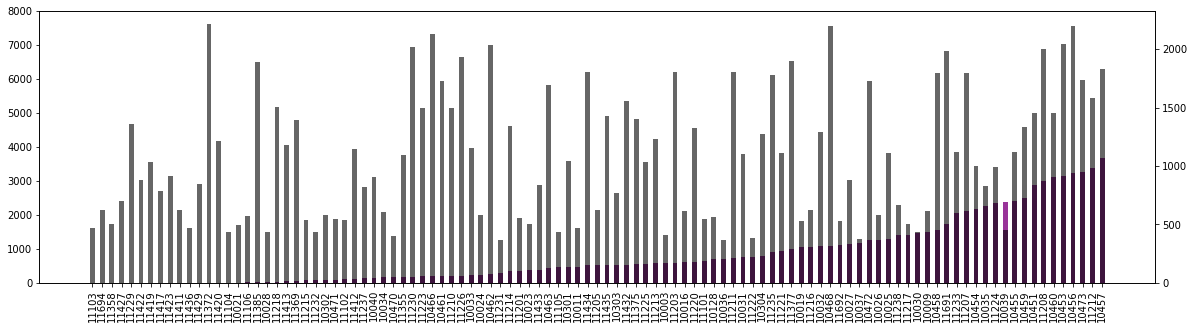

In [283]:
import matplotlib.pyplot as plt
from pylab import *

plt.close('all')

x = plot_data["zipcode"]

fig = plt.figure()
ax1 = fig.add_subplot(111)

plt.ylim(0, 8000)
plt.xticks(arange(len(x)), x, rotation=90)
plt.rcParams['figure.figsize'] = (20,5)

ax1.bar(arange(len(x)), plot_data["low_income_units"], color = "purple", width = 0.5, alpha=0.8)

ax2 = ax1.twinx()
ax2.bar(arange(len(x)), plot_data["Positive"], color = "black", width = 0.5, alpha=0.6)

plt.show()

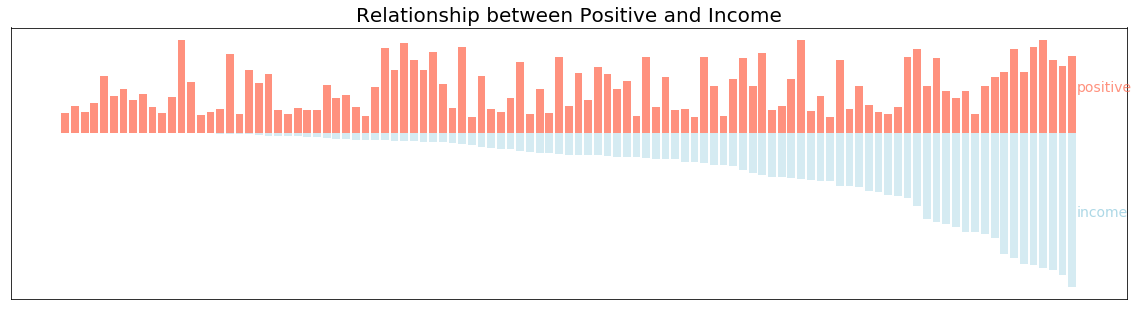

In [340]:
plt.close('all')

fig, ax = plt.subplots()

x = arange(len(plot_data["zipcode"]))
y1 = plot_data["Positive"]
y2 = plot_data["low_income_units"]

ax.bar(x, +y1, color = "tomato", alpha = 0.7)
ax.bar(x, -y2,  color = "lightblue", alpha = 0.5)

plt.title("Relationship between Positive and Income",fontsize = 20)
ax.annotate('income', xy = (0, 0), xytext=(104.5, -2000), color = "lightblue", size = 14)
ax.annotate('positive', xy = (0, 0), xytext=(104.5, 1000), color = "tomato", alpha = 0.7, size = 14)

plt.xticks(())
plt.yticks(())

plt.show()